In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
train = pd.read_excel('../DataSet/train.xlsx')
test = pd.read_excel('../DataSet/testa.xlsx')
Y_test = pd.read_csv('../DataSet/测试集A_答案.csv',header=None)

In [4]:
for i in test.columns:
    if i not in train.columns:
        test = test.drop(i, axis=1)

In [5]:
train = train.to_numpy()
test = test.to_numpy()
Y_test = Y_test.to_numpy()
train = np.delete(train, 0, axis=1)
test = np.delete(test, 0, axis=1)
Y_test = np.delete(Y_test, 0, axis=1)

In [6]:
X_train, Y_train = train[:, :-1], train[:, -1]
X_test = test

In [7]:
X_train, Y_train = X_train.astype(float), Y_train.astype(float)
X_test, Y_test = X_test.astype(float), Y_test.astype(float)

In [69]:
model=ElasticNetCV(alphas=[0.01,0.01]) #利用弹性网的交叉验证法
model.fit(X_train,Y_train)
mse = mean_squared_error(Y_test, model.predict(X_test))
print("均方误差：", mse)

d:\Learn\Environment\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.472e+00, tolerance: 2.684e-03
  model = cd_fast.enet_coordinate_descent(
d:\Learn\Environment\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.468e+00, tolerance: 2.684e-03
  model = cd_fast.enet_coordinate_descent(
d:\Learn\Environment\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.25

均方误差： 0.06647563945100106


d:\Learn\Environment\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.621e+00, tolerance: 3.360e-03
  model = cd_fast.enet_coordinate_descent(


In [118]:
ridge = Ridge(alpha=5e9)
ridge.fit(X_train, Y_train)
Y_pred = ridge.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print("均方误差：", mse)

均方误差： 0.06077598774973724


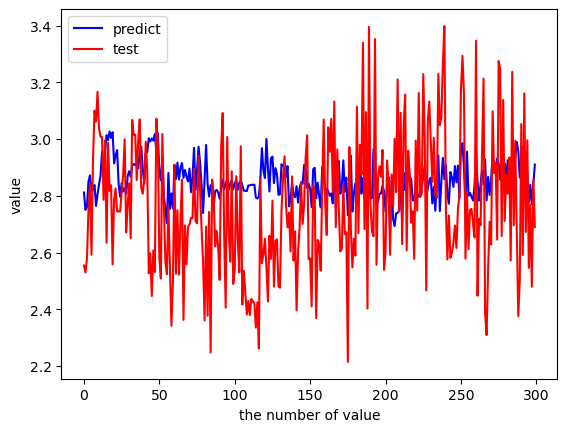

In [119]:
plt.figure();
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict");   #x: x轴上的数值 y: y轴上的数值 ls：折线图的线条风格 lw：折线图的线条宽度 label：标记图内容的标签文本
plt.plot(range(len(Y_test)),Y_test,'r',label="test");
plt.xlabel("the number of value");
plt.ylabel("value");
plt.legend();  # 用于显示plot函数里面 label标签
plt.show();